In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
dataset = pd.read_csv('abalone.csv')

#describe the dataset

dataset.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [3]:
#min height is 0... there should be an issue. let's find the errors
dataset[dataset['Height']==0]


#remove rows with height = 0
dataset = dataset[dataset['Height']>0]

dataset.describe()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:

#Transform sex into a dummy variable
dataset['Male'] = (dataset['Sex']=='M').astype(int)
dataset['Female'] = (dataset['Sex']=='F').astype(int)
dataset['Infant'] = (dataset['Sex']=='I').astype(int)

dataset.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings,Male,Female,Infant
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


In [5]:
y = dataset['Rings'] + 1.5 #AGE is rings + 1.5

"""
in real life we do not know the number of rings utill we cut the abalone... 
the purpose of this ML is to predict the age without cutting the abalone and count the rings
"""

dataset = dataset.drop('Rings', axis=1)
dataset = dataset.drop('Sex', axis=1)

In [6]:
dataset.head()

,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Male,Female,Infant
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.33, random_state=42)

In [8]:
X_train.head()


,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Male,Female,Infant
1430,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,0,0,1
2496,0.520,0.400,0.130,0.6245,0.2150,0.2065,0.1700,0,1,0
472,0.430,0.340,0.120,0.3575,0.1510,0.0645,0.1045,0,0,1
2231,0.505,0.400,0.165,0.7290,0.2675,0.1550,0.2500,0,1,0
3352,0.520,0.405,0.145,0.8290,0.3535,0.1685,0.2050,0,1,0


In [9]:
y_train.head()

1430     5.5
2496    16.5
472     10.5
2231    10.5
3352    16.5
Name: Rings, dtype: float64

In [10]:
model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

optimizer = tf.train.AdamOptimizer()
# optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(optimizer=optimizer,
             loss="mse",metrics=['mae', 'mse'])



In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=1000, validation_split = 0.2, verbose=1)

Train on 2237 samples, validate on 560 samples
Epoch 1/1000
2237/2237 [==============================] - 0s 110us/step - loss: 52.9342 - mean_absolute_error: 5.9475 - mean_squared_error: 52.9342 - val_loss: 6.9627 - val_mean_absolute_error: 1.9861 - val_mean_squared_error: 6.9627
Epoch 2/1000
2237/2237 [==============================] - 0s 27us/step - loss: 7.6589 - mean_absolute_error: 1.9708 - mean_squared_error: 7.6589 - val_loss: 6.4185 - val_mean_absolute_error: 1.9696 - val_mean_squared_error: 6.4185
Epoch 3/1000
2237/2237 [==============================] - 0s 28us/step - loss: 7.0054 - mean_absolute_error: 1.9084 - mean_squared_error: 7.0054 - val_loss: 5.7896 - val_mean_absolute_error: 1.7791 - val_mean_squared_error: 5.7896
Epoch 4/1000
2237/2237 [==============================] - 0s 30us/step - loss: 6.7518 - mean_absolute_error: 1.8703 - mean_squared_error: 6.7518 - val_loss: 5.6614 - val_mean_absolute_error: 1.8080 - val_mean_squared_error: 5.6614
Epoch 5/1000
2237/2237 [==

2237/2237 [==============================] - 0s 30us/step - loss: 4.7180 - mean_absolute_error: 1.5437 - mean_squared_error: 4.7180 - val_loss: 4.1366 - val_mean_absolute_error: 1.5161 - val_mean_squared_error: 4.1366
Epoch 37/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.8203 - mean_absolute_error: 1.5650 - mean_squared_error: 4.8203 - val_loss: 4.0841 - val_mean_absolute_error: 1.4481 - val_mean_squared_error: 4.0841
Epoch 38/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.7038 - mean_absolute_error: 1.5381 - mean_squared_error: 4.7038 - val_loss: 3.9952 - val_mean_absolute_error: 1.4850 - val_mean_squared_error: 3.9952
Epoch 39/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.7365 - mean_absolute_error: 1.5488 - mean_squared_error: 4.7365 - val_loss: 4.1334 - val_mean_absolute_error: 1.5043 - val_mean_squared_error: 4.1334
Epoch 40/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.6904

2237/2237 [==============================] - 0s 30us/step - loss: 4.6194 - mean_absolute_error: 1.5358 - mean_squared_error: 4.6194 - val_loss: 4.1044 - val_mean_absolute_error: 1.4226 - val_mean_squared_error: 4.1044
Epoch 72/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.7088 - mean_absolute_error: 1.5341 - mean_squared_error: 4.7088 - val_loss: 3.8795 - val_mean_absolute_error: 1.4226 - val_mean_squared_error: 3.8795
Epoch 73/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.5896 - mean_absolute_error: 1.5129 - mean_squared_error: 4.5896 - val_loss: 4.0529 - val_mean_absolute_error: 1.4359 - val_mean_squared_error: 4.0529
Epoch 74/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.5701 - mean_absolute_error: 1.5171 - mean_squared_error: 4.5701 - val_loss: 3.9628 - val_mean_absolute_error: 1.4441 - val_mean_squared_error: 3.9628
Epoch 75/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.5989

2237/2237 [==============================] - 0s 23us/step - loss: 4.5593 - mean_absolute_error: 1.5071 - mean_squared_error: 4.5593 - val_loss: 3.8802 - val_mean_absolute_error: 1.3962 - val_mean_squared_error: 3.8802
Epoch 107/1000
2237/2237 [==============================] - 0s 24us/step - loss: 4.5408 - mean_absolute_error: 1.5181 - mean_squared_error: 4.5408 - val_loss: 3.8989 - val_mean_absolute_error: 1.4259 - val_mean_squared_error: 3.8989
Epoch 108/1000
2237/2237 [==============================] - 0s 24us/step - loss: 4.5566 - mean_absolute_error: 1.5069 - mean_squared_error: 4.5566 - val_loss: 3.8755 - val_mean_absolute_error: 1.4180 - val_mean_squared_error: 3.8755
Epoch 109/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.5222 - mean_absolute_error: 1.4950 - mean_squared_error: 4.5222 - val_loss: 3.8737 - val_mean_absolute_error: 1.4513 - val_mean_squared_error: 3.8737
Epoch 110/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.

2237/2237 [==============================] - 0s 27us/step - loss: 4.4811 - mean_absolute_error: 1.4988 - mean_squared_error: 4.4811 - val_loss: 3.8480 - val_mean_absolute_error: 1.4260 - val_mean_squared_error: 3.8480
Epoch 142/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.4584 - mean_absolute_error: 1.4918 - mean_squared_error: 4.4584 - val_loss: 3.7756 - val_mean_absolute_error: 1.4187 - val_mean_squared_error: 3.7756
Epoch 143/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.4261 - mean_absolute_error: 1.5014 - mean_squared_error: 4.4261 - val_loss: 3.7894 - val_mean_absolute_error: 1.3937 - val_mean_squared_error: 3.7894
Epoch 144/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.4888 - mean_absolute_error: 1.4985 - mean_squared_error: 4.4888 - val_loss: 3.7585 - val_mean_absolute_error: 1.4298 - val_mean_squared_error: 3.7585
Epoch 145/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.

2237/2237 [==============================] - 0s 29us/step - loss: 4.4330 - mean_absolute_error: 1.4814 - mean_squared_error: 4.4330 - val_loss: 3.7640 - val_mean_absolute_error: 1.3729 - val_mean_squared_error: 3.7640
Epoch 177/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.4679 - mean_absolute_error: 1.4962 - mean_squared_error: 4.4679 - val_loss: 3.7720 - val_mean_absolute_error: 1.4170 - val_mean_squared_error: 3.7720
Epoch 178/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.4383 - mean_absolute_error: 1.4943 - mean_squared_error: 4.4383 - val_loss: 3.6931 - val_mean_absolute_error: 1.3774 - val_mean_squared_error: 3.6931
Epoch 179/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.4565 - mean_absolute_error: 1.4907 - mean_squared_error: 4.4565 - val_loss: 3.7873 - val_mean_absolute_error: 1.4135 - val_mean_squared_error: 3.7873
Epoch 180/1000
2237/2237 [==============================] - 0s 31us/step - loss: 4.

2237/2237 [==============================] - 0s 30us/step - loss: 4.3632 - mean_absolute_error: 1.4710 - mean_squared_error: 4.3632 - val_loss: 3.7979 - val_mean_absolute_error: 1.4317 - val_mean_squared_error: 3.7979
Epoch 212/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.3338 - mean_absolute_error: 1.4704 - mean_squared_error: 4.3338 - val_loss: 3.7897 - val_mean_absolute_error: 1.4099 - val_mean_squared_error: 3.7897
Epoch 213/1000
2237/2237 [==============================] - 0s 31us/step - loss: 4.3709 - mean_absolute_error: 1.4811 - mean_squared_error: 4.3709 - val_loss: 3.7692 - val_mean_absolute_error: 1.3660 - val_mean_squared_error: 3.7692
Epoch 214/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.4055 - mean_absolute_error: 1.4755 - mean_squared_error: 4.4055 - val_loss: 3.8438 - val_mean_absolute_error: 1.4457 - val_mean_squared_error: 3.8438
Epoch 215/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.

2237/2237 [==============================] - 0s 31us/step - loss: 4.2860 - mean_absolute_error: 1.4670 - mean_squared_error: 4.2860 - val_loss: 3.8172 - val_mean_absolute_error: 1.4227 - val_mean_squared_error: 3.8172
Epoch 247/1000
2237/2237 [==============================] - 0s 31us/step - loss: 4.3450 - mean_absolute_error: 1.4876 - mean_squared_error: 4.3450 - val_loss: 3.8757 - val_mean_absolute_error: 1.4059 - val_mean_squared_error: 3.8757
Epoch 248/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.4259 - mean_absolute_error: 1.4982 - mean_squared_error: 4.4259 - val_loss: 3.6910 - val_mean_absolute_error: 1.3541 - val_mean_squared_error: 3.6910
Epoch 249/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.3029 - mean_absolute_error: 1.4590 - mean_squared_error: 4.3029 - val_loss: 3.6840 - val_mean_absolute_error: 1.3879 - val_mean_squared_error: 3.6840
Epoch 250/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.

2237/2237 [==============================] - 0s 31us/step - loss: 4.2502 - mean_absolute_error: 1.4709 - mean_squared_error: 4.2502 - val_loss: 3.8601 - val_mean_absolute_error: 1.4306 - val_mean_squared_error: 3.8601
Epoch 282/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.2826 - mean_absolute_error: 1.4627 - mean_squared_error: 4.2826 - val_loss: 3.7202 - val_mean_absolute_error: 1.3849 - val_mean_squared_error: 3.7202
Epoch 283/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.3708 - mean_absolute_error: 1.4821 - mean_squared_error: 4.3708 - val_loss: 3.8197 - val_mean_absolute_error: 1.4271 - val_mean_squared_error: 3.8197
Epoch 284/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.2935 - mean_absolute_error: 1.4715 - mean_squared_error: 4.2935 - val_loss: 3.6752 - val_mean_absolute_error: 1.3633 - val_mean_squared_error: 3.6752
Epoch 285/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.

2237/2237 [==============================] - 0s 28us/step - loss: 4.2698 - mean_absolute_error: 1.4691 - mean_squared_error: 4.2698 - val_loss: 3.7427 - val_mean_absolute_error: 1.3793 - val_mean_squared_error: 3.7427
Epoch 317/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.2436 - mean_absolute_error: 1.4597 - mean_squared_error: 4.2436 - val_loss: 3.6705 - val_mean_absolute_error: 1.3503 - val_mean_squared_error: 3.6705
Epoch 318/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.2481 - mean_absolute_error: 1.4618 - mean_squared_error: 4.2481 - val_loss: 3.6665 - val_mean_absolute_error: 1.3834 - val_mean_squared_error: 3.6665
Epoch 319/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.2467 - mean_absolute_error: 1.4583 - mean_squared_error: 4.2467 - val_loss: 4.1429 - val_mean_absolute_error: 1.5248 - val_mean_squared_error: 4.1429
Epoch 320/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.

2237/2237 [==============================] - 0s 28us/step - loss: 4.2085 - mean_absolute_error: 1.4488 - mean_squared_error: 4.2085 - val_loss: 3.6366 - val_mean_absolute_error: 1.3623 - val_mean_squared_error: 3.6366
Epoch 352/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.2427 - mean_absolute_error: 1.4649 - mean_squared_error: 4.2427 - val_loss: 3.8254 - val_mean_absolute_error: 1.4007 - val_mean_squared_error: 3.8254
Epoch 353/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.2282 - mean_absolute_error: 1.4502 - mean_squared_error: 4.2282 - val_loss: 3.6906 - val_mean_absolute_error: 1.3624 - val_mean_squared_error: 3.6906
Epoch 354/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.2036 - mean_absolute_error: 1.4559 - mean_squared_error: 4.2036 - val_loss: 3.7127 - val_mean_absolute_error: 1.3627 - val_mean_squared_error: 3.7127
Epoch 355/1000
2237/2237 [==============================] - 0s 33us/step - loss: 4.

2237/2237 [==============================] - 0s 31us/step - loss: 4.1632 - mean_absolute_error: 1.4482 - mean_squared_error: 4.1632 - val_loss: 3.7238 - val_mean_absolute_error: 1.3671 - val_mean_squared_error: 3.7238
Epoch 387/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.1891 - mean_absolute_error: 1.4592 - mean_squared_error: 4.1891 - val_loss: 4.0473 - val_mean_absolute_error: 1.4550 - val_mean_squared_error: 4.0473
Epoch 388/1000
2237/2237 [==============================] - 0s 26us/step - loss: 4.1897 - mean_absolute_error: 1.4477 - mean_squared_error: 4.1897 - val_loss: 3.8800 - val_mean_absolute_error: 1.4381 - val_mean_squared_error: 3.8800
Epoch 389/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.1625 - mean_absolute_error: 1.4450 - mean_squared_error: 4.1625 - val_loss: 3.9490 - val_mean_absolute_error: 1.4600 - val_mean_squared_error: 3.9490
Epoch 390/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.

2237/2237 [==============================] - 0s 28us/step - loss: 4.1412 - mean_absolute_error: 1.4468 - mean_squared_error: 4.1412 - val_loss: 3.8398 - val_mean_absolute_error: 1.3775 - val_mean_squared_error: 3.8398
Epoch 422/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.1935 - mean_absolute_error: 1.4578 - mean_squared_error: 4.1935 - val_loss: 3.7545 - val_mean_absolute_error: 1.3617 - val_mean_squared_error: 3.7545
Epoch 423/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.1598 - mean_absolute_error: 1.4445 - mean_squared_error: 4.1598 - val_loss: 3.7862 - val_mean_absolute_error: 1.3569 - val_mean_squared_error: 3.7862
Epoch 424/1000
2237/2237 [==============================] - 0s 24us/step - loss: 4.1895 - mean_absolute_error: 1.4538 - mean_squared_error: 4.1895 - val_loss: 3.7914 - val_mean_absolute_error: 1.3757 - val_mean_squared_error: 3.7914
Epoch 425/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.

2237/2237 [==============================] - 0s 23us/step - loss: 4.1255 - mean_absolute_error: 1.4370 - mean_squared_error: 4.1255 - val_loss: 3.7709 - val_mean_absolute_error: 1.3896 - val_mean_squared_error: 3.7709
Epoch 457/1000
2237/2237 [==============================] - 0s 23us/step - loss: 4.1323 - mean_absolute_error: 1.4454 - mean_squared_error: 4.1323 - val_loss: 3.7259 - val_mean_absolute_error: 1.3777 - val_mean_squared_error: 3.7259
Epoch 458/1000
2237/2237 [==============================] - 0s 23us/step - loss: 4.1306 - mean_absolute_error: 1.4452 - mean_squared_error: 4.1306 - val_loss: 3.7815 - val_mean_absolute_error: 1.3852 - val_mean_squared_error: 3.7815
Epoch 459/1000
2237/2237 [==============================] - 0s 23us/step - loss: 4.1121 - mean_absolute_error: 1.4417 - mean_squared_error: 4.1121 - val_loss: 3.9829 - val_mean_absolute_error: 1.4751 - val_mean_squared_error: 3.9829
Epoch 460/1000
2237/2237 [==============================] - 0s 23us/step - loss: 4.

2237/2237 [==============================] - 0s 28us/step - loss: 4.1156 - mean_absolute_error: 1.4368 - mean_squared_error: 4.1156 - val_loss: 3.7278 - val_mean_absolute_error: 1.3800 - val_mean_squared_error: 3.7278
Epoch 492/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.0820 - mean_absolute_error: 1.4414 - mean_squared_error: 4.0820 - val_loss: 3.8041 - val_mean_absolute_error: 1.3894 - val_mean_squared_error: 3.8041
Epoch 493/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.1487 - mean_absolute_error: 1.4433 - mean_squared_error: 4.1487 - val_loss: 3.7731 - val_mean_absolute_error: 1.3570 - val_mean_squared_error: 3.7731
Epoch 494/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.1295 - mean_absolute_error: 1.4353 - mean_squared_error: 4.1295 - val_loss: 3.6979 - val_mean_absolute_error: 1.3510 - val_mean_squared_error: 3.6979
Epoch 495/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.

2237/2237 [==============================] - 0s 29us/step - loss: 4.0539 - mean_absolute_error: 1.4243 - mean_squared_error: 4.0539 - val_loss: 3.8705 - val_mean_absolute_error: 1.4095 - val_mean_squared_error: 3.8705
Epoch 527/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.1415 - mean_absolute_error: 1.4475 - mean_squared_error: 4.1415 - val_loss: 4.4917 - val_mean_absolute_error: 1.6033 - val_mean_squared_error: 4.4917
Epoch 528/1000
2237/2237 [==============================] - 0s 24us/step - loss: 4.1222 - mean_absolute_error: 1.4332 - mean_squared_error: 4.1222 - val_loss: 4.2964 - val_mean_absolute_error: 1.5592 - val_mean_squared_error: 4.2964
Epoch 529/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.0953 - mean_absolute_error: 1.4451 - mean_squared_error: 4.0953 - val_loss: 3.7087 - val_mean_absolute_error: 1.3566 - val_mean_squared_error: 3.7087
Epoch 530/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.

2237/2237 [==============================] - 0s 27us/step - loss: 4.1119 - mean_absolute_error: 1.4468 - mean_squared_error: 4.1119 - val_loss: 3.8935 - val_mean_absolute_error: 1.4272 - val_mean_squared_error: 3.8935
Epoch 562/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.0812 - mean_absolute_error: 1.4326 - mean_squared_error: 4.0812 - val_loss: 3.8025 - val_mean_absolute_error: 1.3625 - val_mean_squared_error: 3.8025
Epoch 563/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.0375 - mean_absolute_error: 1.4247 - mean_squared_error: 4.0375 - val_loss: 3.7978 - val_mean_absolute_error: 1.3664 - val_mean_squared_error: 3.7978
Epoch 564/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.0471 - mean_absolute_error: 1.4235 - mean_squared_error: 4.0471 - val_loss: 3.9526 - val_mean_absolute_error: 1.4556 - val_mean_squared_error: 3.9526
Epoch 565/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.

2237/2237 [==============================] - 0s 31us/step - loss: 4.0133 - mean_absolute_error: 1.4228 - mean_squared_error: 4.0133 - val_loss: 4.0786 - val_mean_absolute_error: 1.4663 - val_mean_squared_error: 4.0786
Epoch 597/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.0770 - mean_absolute_error: 1.4405 - mean_squared_error: 4.0770 - val_loss: 3.7759 - val_mean_absolute_error: 1.3552 - val_mean_squared_error: 3.7759
Epoch 598/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.0600 - mean_absolute_error: 1.4319 - mean_squared_error: 4.0600 - val_loss: 3.8201 - val_mean_absolute_error: 1.3720 - val_mean_squared_error: 3.8201
Epoch 599/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.0443 - mean_absolute_error: 1.4308 - mean_squared_error: 4.0443 - val_loss: 3.9623 - val_mean_absolute_error: 1.4285 - val_mean_squared_error: 3.9623
Epoch 600/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.

2237/2237 [==============================] - 0s 31us/step - loss: 4.0270 - mean_absolute_error: 1.4321 - mean_squared_error: 4.0270 - val_loss: 3.8750 - val_mean_absolute_error: 1.3766 - val_mean_squared_error: 3.8750
Epoch 632/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.0608 - mean_absolute_error: 1.4351 - mean_squared_error: 4.0608 - val_loss: 3.9684 - val_mean_absolute_error: 1.3709 - val_mean_squared_error: 3.9684
Epoch 633/1000
2237/2237 [==============================] - 0s 28us/step - loss: 4.1043 - mean_absolute_error: 1.4406 - mean_squared_error: 4.1043 - val_loss: 4.1420 - val_mean_absolute_error: 1.5012 - val_mean_squared_error: 4.1420
Epoch 634/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.0109 - mean_absolute_error: 1.4269 - mean_squared_error: 4.0109 - val_loss: 3.8467 - val_mean_absolute_error: 1.3653 - val_mean_squared_error: 3.8467
Epoch 635/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.

2237/2237 [==============================] - 0s 28us/step - loss: 4.0201 - mean_absolute_error: 1.4119 - mean_squared_error: 4.0201 - val_loss: 3.8303 - val_mean_absolute_error: 1.3701 - val_mean_squared_error: 3.8303
Epoch 667/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.0251 - mean_absolute_error: 1.4283 - mean_squared_error: 4.0251 - val_loss: 3.8713 - val_mean_absolute_error: 1.3803 - val_mean_squared_error: 3.8713
Epoch 668/1000
2237/2237 [==============================] - 0s 29us/step - loss: 4.0762 - mean_absolute_error: 1.4312 - mean_squared_error: 4.0762 - val_loss: 4.1013 - val_mean_absolute_error: 1.4631 - val_mean_squared_error: 4.1013
Epoch 669/1000
2237/2237 [==============================] - 0s 26us/step - loss: 4.0285 - mean_absolute_error: 1.4218 - mean_squared_error: 4.0285 - val_loss: 3.7685 - val_mean_absolute_error: 1.3594 - val_mean_squared_error: 3.7685
Epoch 670/1000
2237/2237 [==============================] - 0s 32us/step - loss: 4.

2237/2237 [==============================] - 0s 31us/step - loss: 3.9770 - mean_absolute_error: 1.4170 - mean_squared_error: 3.9770 - val_loss: 3.8892 - val_mean_absolute_error: 1.3953 - val_mean_squared_error: 3.8892
Epoch 702/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.9541 - mean_absolute_error: 1.4228 - mean_squared_error: 3.9541 - val_loss: 3.7778 - val_mean_absolute_error: 1.3861 - val_mean_squared_error: 3.7778
Epoch 703/1000
2237/2237 [==============================] - 0s 30us/step - loss: 4.0122 - mean_absolute_error: 1.4243 - mean_squared_error: 4.0122 - val_loss: 4.1145 - val_mean_absolute_error: 1.4673 - val_mean_squared_error: 4.1145
Epoch 704/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.9574 - mean_absolute_error: 1.4032 - mean_squared_error: 3.9574 - val_loss: 3.9245 - val_mean_absolute_error: 1.4050 - val_mean_squared_error: 3.9245
Epoch 705/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.

2237/2237 [==============================] - 0s 29us/step - loss: 3.9646 - mean_absolute_error: 1.4107 - mean_squared_error: 3.9646 - val_loss: 3.9309 - val_mean_absolute_error: 1.4238 - val_mean_squared_error: 3.9309
Epoch 737/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.9713 - mean_absolute_error: 1.4215 - mean_squared_error: 3.9713 - val_loss: 4.3111 - val_mean_absolute_error: 1.5109 - val_mean_squared_error: 4.3111
Epoch 738/1000
2237/2237 [==============================] - 0s 25us/step - loss: 3.9688 - mean_absolute_error: 1.4146 - mean_squared_error: 3.9688 - val_loss: 4.0185 - val_mean_absolute_error: 1.4288 - val_mean_squared_error: 4.0185
Epoch 739/1000
2237/2237 [==============================] - 0s 25us/step - loss: 4.0352 - mean_absolute_error: 1.4272 - mean_squared_error: 4.0352 - val_loss: 3.9516 - val_mean_absolute_error: 1.4270 - val_mean_squared_error: 3.9516
Epoch 740/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.

2237/2237 [==============================] - 0s 28us/step - loss: 3.9351 - mean_absolute_error: 1.4163 - mean_squared_error: 3.9351 - val_loss: 4.2336 - val_mean_absolute_error: 1.4932 - val_mean_squared_error: 4.2336
Epoch 772/1000
2237/2237 [==============================] - 0s 28us/step - loss: 3.9249 - mean_absolute_error: 1.4119 - mean_squared_error: 3.9249 - val_loss: 4.1196 - val_mean_absolute_error: 1.4869 - val_mean_squared_error: 4.1196
Epoch 773/1000
2237/2237 [==============================] - 0s 28us/step - loss: 3.9111 - mean_absolute_error: 1.4052 - mean_squared_error: 3.9111 - val_loss: 3.7995 - val_mean_absolute_error: 1.3578 - val_mean_squared_error: 3.7995
Epoch 774/1000
2237/2237 [==============================] - 0s 26us/step - loss: 3.9733 - mean_absolute_error: 1.4094 - mean_squared_error: 3.9733 - val_loss: 4.0736 - val_mean_absolute_error: 1.4518 - val_mean_squared_error: 4.0736
Epoch 775/1000
2237/2237 [==============================] - 0s 27us/step - loss: 3.

2237/2237 [==============================] - 0s 30us/step - loss: 3.9498 - mean_absolute_error: 1.4088 - mean_squared_error: 3.9498 - val_loss: 3.8638 - val_mean_absolute_error: 1.3631 - val_mean_squared_error: 3.8638
Epoch 807/1000
2237/2237 [==============================] - 0s 31us/step - loss: 3.9064 - mean_absolute_error: 1.4080 - mean_squared_error: 3.9064 - val_loss: 3.9304 - val_mean_absolute_error: 1.4225 - val_mean_squared_error: 3.9304
Epoch 808/1000
2237/2237 [==============================] - 0s 31us/step - loss: 3.9455 - mean_absolute_error: 1.4127 - mean_squared_error: 3.9455 - val_loss: 3.9739 - val_mean_absolute_error: 1.4237 - val_mean_squared_error: 3.9739
Epoch 809/1000
2237/2237 [==============================] - 0s 32us/step - loss: 3.8667 - mean_absolute_error: 1.3989 - mean_squared_error: 3.8667 - val_loss: 3.9017 - val_mean_absolute_error: 1.4266 - val_mean_squared_error: 3.9017
Epoch 810/1000
2237/2237 [==============================] - 0s 28us/step - loss: 3.

2237/2237 [==============================] - 0s 27us/step - loss: 3.9161 - mean_absolute_error: 1.4148 - mean_squared_error: 3.9161 - val_loss: 3.8966 - val_mean_absolute_error: 1.3587 - val_mean_squared_error: 3.8966
Epoch 842/1000
2237/2237 [==============================] - 0s 27us/step - loss: 4.0050 - mean_absolute_error: 1.4255 - mean_squared_error: 4.0050 - val_loss: 3.8652 - val_mean_absolute_error: 1.3776 - val_mean_squared_error: 3.8652
Epoch 843/1000
2237/2237 [==============================] - 0s 27us/step - loss: 3.9292 - mean_absolute_error: 1.4092 - mean_squared_error: 3.9292 - val_loss: 3.9047 - val_mean_absolute_error: 1.3716 - val_mean_squared_error: 3.9047
Epoch 844/1000
2237/2237 [==============================] - 0s 27us/step - loss: 3.8902 - mean_absolute_error: 1.4083 - mean_squared_error: 3.8902 - val_loss: 3.8857 - val_mean_absolute_error: 1.3868 - val_mean_squared_error: 3.8857
Epoch 845/1000
2237/2237 [==============================] - 0s 25us/step - loss: 3.

2237/2237 [==============================] - 0s 30us/step - loss: 3.8252 - mean_absolute_error: 1.3867 - mean_squared_error: 3.8252 - val_loss: 4.3991 - val_mean_absolute_error: 1.5236 - val_mean_squared_error: 4.3991
Epoch 877/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.9012 - mean_absolute_error: 1.4200 - mean_squared_error: 3.9012 - val_loss: 3.9987 - val_mean_absolute_error: 1.4454 - val_mean_squared_error: 3.9987
Epoch 878/1000
2237/2237 [==============================] - 0s 26us/step - loss: 3.8821 - mean_absolute_error: 1.4086 - mean_squared_error: 3.8821 - val_loss: 3.8913 - val_mean_absolute_error: 1.3791 - val_mean_squared_error: 3.8913
Epoch 879/1000
2237/2237 [==============================] - 0s 26us/step - loss: 3.8352 - mean_absolute_error: 1.3932 - mean_squared_error: 3.8352 - val_loss: 3.9228 - val_mean_absolute_error: 1.3717 - val_mean_squared_error: 3.9228
Epoch 880/1000
2237/2237 [==============================] - 0s 30us/step - loss: 3.

2237/2237 [==============================] - 0s 28us/step - loss: 3.8934 - mean_absolute_error: 1.4056 - mean_squared_error: 3.8934 - val_loss: 3.9762 - val_mean_absolute_error: 1.4308 - val_mean_squared_error: 3.9762
Epoch 912/1000
2237/2237 [==============================] - 0s 27us/step - loss: 3.8076 - mean_absolute_error: 1.3978 - mean_squared_error: 3.8076 - val_loss: 3.8210 - val_mean_absolute_error: 1.3616 - val_mean_squared_error: 3.8210
Epoch 913/1000
2237/2237 [==============================] - 0s 25us/step - loss: 3.8570 - mean_absolute_error: 1.3995 - mean_squared_error: 3.8570 - val_loss: 3.9995 - val_mean_absolute_error: 1.4126 - val_mean_squared_error: 3.9995
Epoch 914/1000
2237/2237 [==============================] - 0s 27us/step - loss: 3.8403 - mean_absolute_error: 1.3934 - mean_squared_error: 3.8403 - val_loss: 3.9524 - val_mean_absolute_error: 1.3672 - val_mean_squared_error: 3.9524
Epoch 915/1000
2237/2237 [==============================] - 0s 26us/step - loss: 3.

2237/2237 [==============================] - 0s 32us/step - loss: 3.8717 - mean_absolute_error: 1.4139 - mean_squared_error: 3.8717 - val_loss: 4.1668 - val_mean_absolute_error: 1.4748 - val_mean_squared_error: 4.1668
Epoch 947/1000
2237/2237 [==============================] - 0s 27us/step - loss: 3.9692 - mean_absolute_error: 1.4182 - mean_squared_error: 3.9692 - val_loss: 4.2321 - val_mean_absolute_error: 1.4853 - val_mean_squared_error: 4.2321
Epoch 948/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.8771 - mean_absolute_error: 1.4019 - mean_squared_error: 3.8771 - val_loss: 3.9485 - val_mean_absolute_error: 1.4144 - val_mean_squared_error: 3.9485
Epoch 949/1000
2237/2237 [==============================] - 0s 25us/step - loss: 3.7814 - mean_absolute_error: 1.3884 - mean_squared_error: 3.7814 - val_loss: 3.7997 - val_mean_absolute_error: 1.3720 - val_mean_squared_error: 3.7997
Epoch 950/1000
2237/2237 [==============================] - 0s 25us/step - loss: 3.

2237/2237 [==============================] - 0s 29us/step - loss: 3.7843 - mean_absolute_error: 1.3847 - mean_squared_error: 3.7843 - val_loss: 3.8520 - val_mean_absolute_error: 1.3774 - val_mean_squared_error: 3.8520
Epoch 982/1000
2237/2237 [==============================] - 0s 28us/step - loss: 3.7791 - mean_absolute_error: 1.4009 - mean_squared_error: 3.7791 - val_loss: 3.9807 - val_mean_absolute_error: 1.3663 - val_mean_squared_error: 3.9807
Epoch 983/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.9114 - mean_absolute_error: 1.4023 - mean_squared_error: 3.9114 - val_loss: 3.9423 - val_mean_absolute_error: 1.3716 - val_mean_squared_error: 3.9423
Epoch 984/1000
2237/2237 [==============================] - 0s 26us/step - loss: 3.9598 - mean_absolute_error: 1.4136 - mean_squared_error: 3.9598 - val_loss: 4.1658 - val_mean_absolute_error: 1.4564 - val_mean_squared_error: 4.1658
Epoch 985/1000
2237/2237 [==============================] - 0s 29us/step - loss: 3.

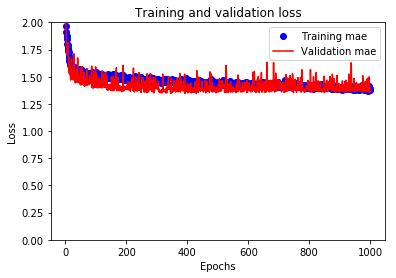

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)
plt.gca().set_ylim(0,2)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training mae')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation mae')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
model.evaluate(X_test, y_test, verbose=1)

1378/1378 [==============================] - 0s 18us/step


[4.563285556777295, 1.4922593639966193, 4.563285556777295]

In [15]:
test_predictions = model.predict(X_test).flatten()

In [16]:
error = test_predictions - y_test

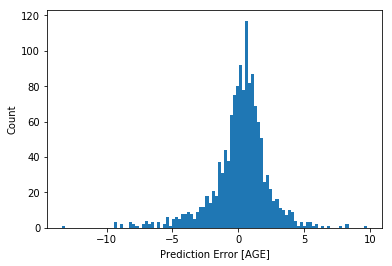

In [17]:
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [AGE]")
_ = plt.ylabel("Count")